## Name: Sandeep Kumar
## Student No: 23087422
## Assignment: Clustering and Fitting

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import warnings
import yellowbrick


warnings.filterwarnings('ignore')

In [31]:
data=pd.read_csv('Credit Card Customer Data.csv')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [32]:
data['Total_Credit_Cards'].value_counts().head()


Total_Credit_Cards
4    151
6    117
7    101
5     74
2     64
Name: count, dtype: int64

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0
Cluster,660.0,1.593939,1.198871,0.0,0.00,2.0,3.00,3.0


In [57]:
# Handle duplicates by removing them
credit_data_no_duplicates = data.drop_duplicates()

# Handle missing values (although none are present in this dataset)
# For demonstration, applying a general strategy: fill numeric columns with the median
credit_data_cleaned = credit_data_no_duplicates.copy()
numeric_cols = credit_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
credit_data_cleaned[numeric_cols] = credit_data_cleaned[numeric_cols].fillna(credit_data_cleaned[numeric_cols].median())

# Verify cleaning
cleaning_summary = {
    "Remaining Duplicates": credit_data_cleaned.duplicated().sum(),
    "Remaining Missing Values": credit_data_cleaned.isnull().sum()
}

# Display the cleaning summary
print("Data Cleaning Summary:")
print(cleaning_summary)

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset:")
print(credit_data_cleaned.head())

Data Cleaning Summary:
{'Remaining Duplicates': 0, 'Remaining Missing Values': Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
Cluster                0
dtype: int64}
Cleaned Dataset:
   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  Cluster  
0                  1                    1                 0        0  
1                  0                   10                 9        2  
2                  1                    3                 4        0  
3                  1 

This pie chart represents the distribution of categories, likely labeled 2, 4, 5, 6, and 7, with percentages indicating their share of the total.
Category 4: Largest share (29.78%).
Category 2: Smallest share (12.62%).
Other categories (6, 7, and 5) have moderate shares, with Category 6 contributing 23.08%.

<Axes: ylabel='count'>

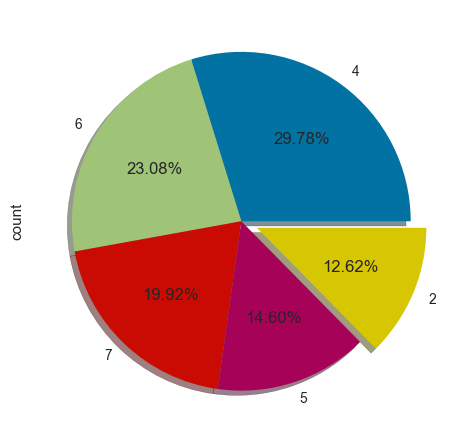

In [33]:
data['Total_Credit_Cards'].value_counts().head().plot(kind='pie',explode=(0,0,0,0,0.1),shadow=True,autopct="%1.2f%%")

This histogram shows the distribution of average credit limits:
Most customers have an average credit limit between 0 and 25,000.
The distribution is right-skewed, with fewer customers having higher credit limits beyond 75,000.
A density curve overlays the histogram, highlighting the peak and the gradual decline in frequency.
This plot provides insight into the concentration of customers with lower credit limits.

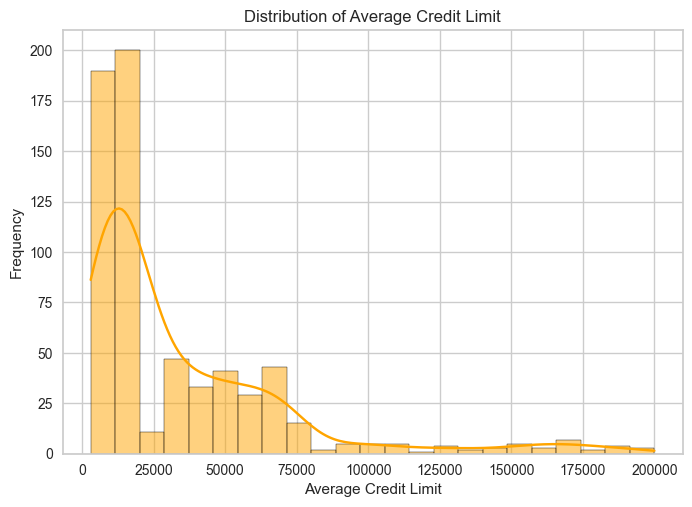

In [34]:
sns.histplot(data['Avg_Credit_Limit'], kde=True,color='orange')
plt.title('Distribution of Average Credit Limit')
plt.xlabel('Average Credit Limit')
plt.ylabel('Frequency')
plt.show()

This correlation heatmap highlights:
Avg_Credit_Limit is positively correlated with Total_Credit_Cards (0.61) and Total_visits_online (0.55), but negatively with Total_calls_made (-0.41).
Total_calls_made shows negative correlations with most features, including Avg_Credit_Limit and Total_visits_bank.
Strong correlations suggest key predictors of credit limit.

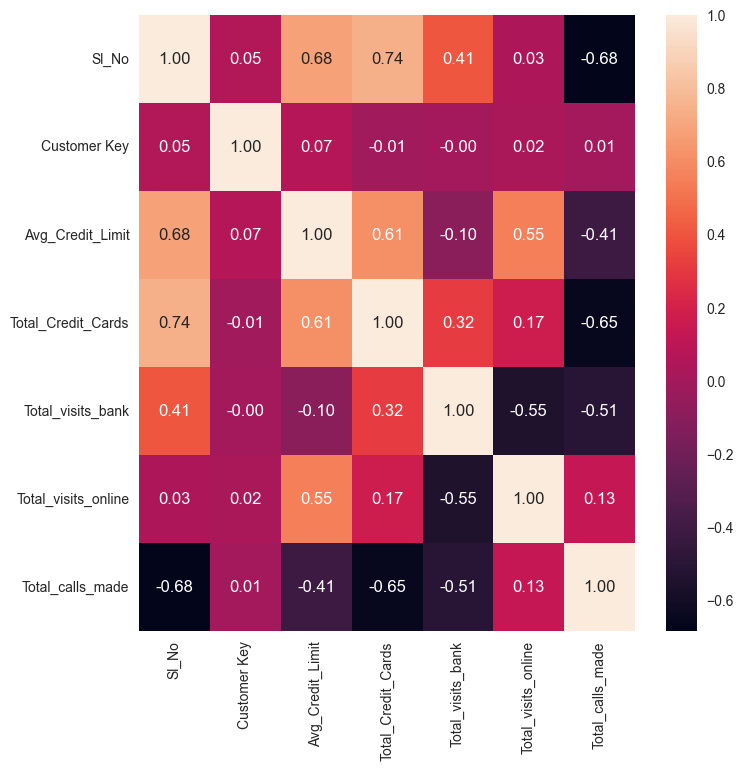

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

In [36]:
data['Total_visits_bank'].value_counts()


Total_visits_bank
2    158
1    112
0    100
3    100
5     98
4     92
Name: count, dtype: int64

In [37]:
x=data.iloc[:,2:]
x

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [38]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(x)
data_scaled=pd.DataFrame(data_scaled,columns=x.columns)

In [39]:
data_scaled=pd.DataFrame(data_scaled,columns=x.columns)



In [40]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init ='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

This elbow method plot shows WCSS vs. number of clusters. 
The "elbow" at 3 clusters indicates the optimal number of clusters, where adding more clusters yields diminishing returns.

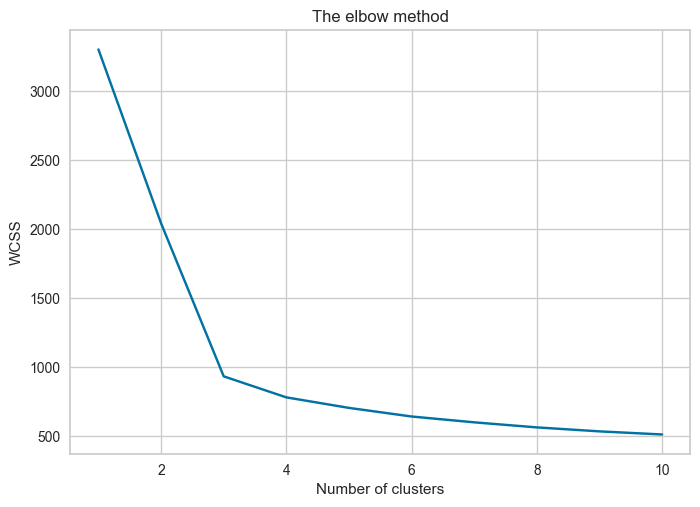

In [41]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data_scaled)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [43]:
kmeans.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
kmeans.cluster_centers_


array([[-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [45]:
# Assuming y_kmeans contains cluster labels (0, 1, 2)
cluster_0_data = data_scaled[y_kmeans == 0]
cluster_1_data = data_scaled[y_kmeans == 1]
cluster_2_data = data_scaled[y_kmeans == 2]

In [46]:
cluster_2_data


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
612,3.256266,1.982253,-0.860451,3.884078,-0.902271
613,1.580600,1.982253,-0.860451,2.861408,-1.251537
614,3.415854,1.520613,-0.860451,1.497849,-0.902271
615,2.564721,1.982253,-0.860451,2.520519,-0.902271
616,1.633795,2.443892,-0.860451,2.861408,-0.553005
617,2.697711,1.520613,-1.473731,3.543188,-1.251537
618,2.298742,1.058973,-1.473731,3.543188,-0.553005
619,3.282864,1.058973,-1.473731,3.543188,-1.251537


K-means clustering with three clusters:
Cluster 1 (Red), Cluster 2 (Orange), and Cluster 3 (Green) are groups of data points.
Black dots represent the centroids (cluster centers).
The x and y axes are likely scaled feature values.
It shows how the data is grouped, with Cluster 2 being compact and Cluster 3 more dispersed.

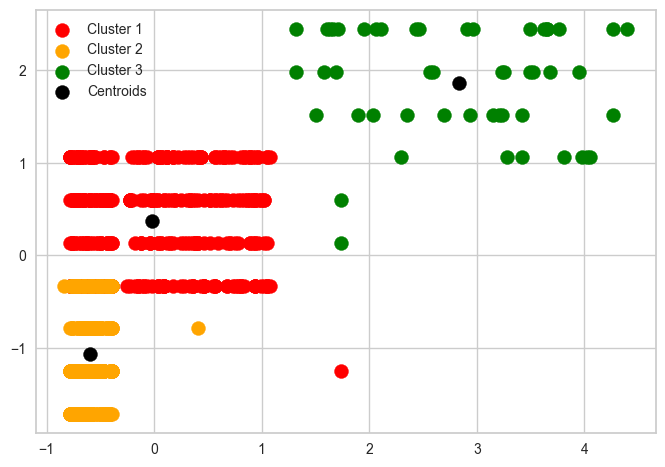

In [47]:
# Use filtered data for plotting
plt.scatter(cluster_0_data.iloc[:, 0], cluster_0_data.iloc[:, 1], s=100, c='red', label='Cluster 1')
plt.scatter(cluster_1_data.iloc[:, 0], cluster_1_data.iloc[:, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(cluster_2_data.iloc[:, 0], cluster_2_data.iloc[:, 1], s=100, c='green', label='Cluster 3')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids');

plt.legend()
plt.show()

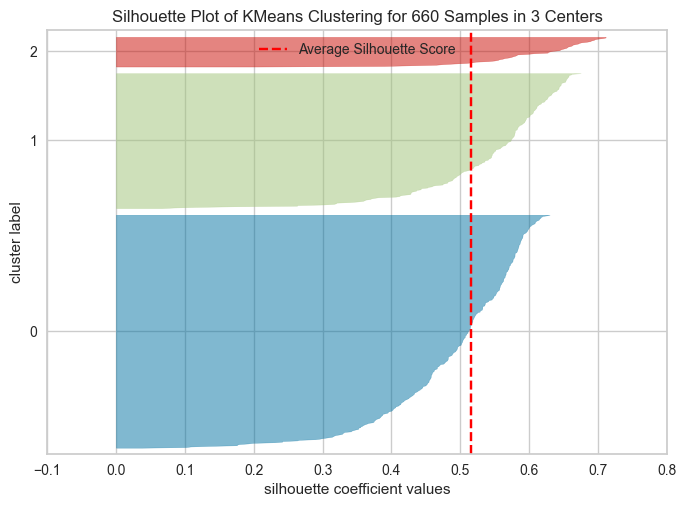

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()

In [49]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a KMeans instance with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', max_iter=400, n_init=10)
    
    # Fit the model to the data
    cluster_labels = kmeans.fit_predict(data_scaled)
    
    # Calculate silhouette scores
    silhouette_vals = silhouette_samples(data_scaled, cluster_labels)
    
    avg_silhouette_score = silhouette_vals.mean()
    print(f'Number of clusters: {n_clusters}, Average silhouette score: {avg_silhouette_score:.2f}')


Number of clusters: 2, Average silhouette score: 0.42
Number of clusters: 3, Average silhouette score: 0.52
Number of clusters: 4, Average silhouette score: 0.36
Number of clusters: 5, Average silhouette score: 0.27


Linear Regression: Actual vs Predicted
The scatter plot below shows the predicted average credit limit against the actual values. The red line represents an ideal fit.

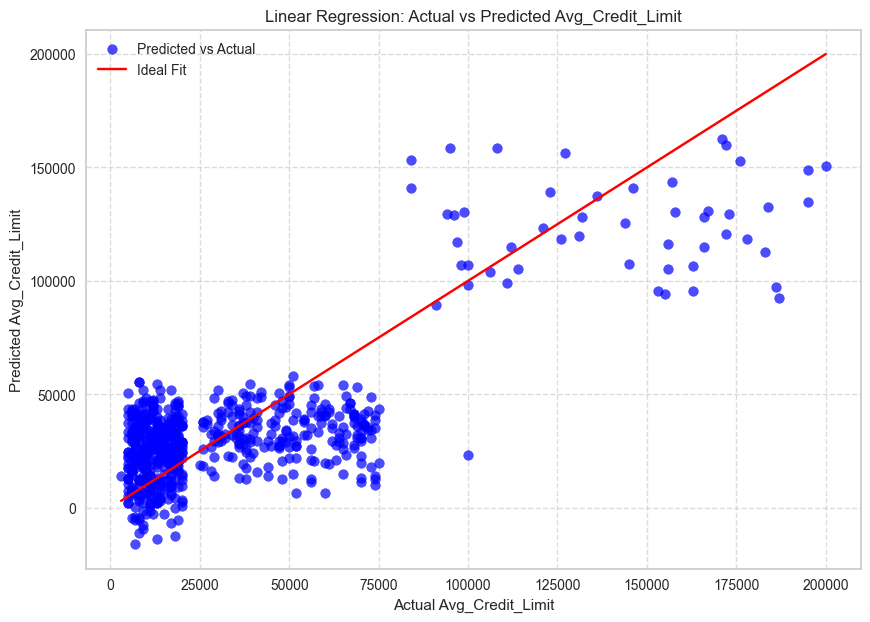

In [54]:


# Define the features and target variable for regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_credit = data[["Total_Credit_Cards", "Total_visits_bank", "Total_visits_online", "Total_calls_made"]]
y_credit = data["Avg_Credit_Limit"]

# Fit a linear regression model
linear_model_credit = LinearRegression()
linear_model_credit.fit(X_credit, y_credit)

# Predict values
y_pred_credit = linear_model_credit.predict(X_credit)

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 7))

# Scatter plot of actual vs predicted values
plt.scatter(y_credit, y_pred_credit, color="blue", alpha=0.7, label="Predicted vs Actual")
plt.plot([y_credit.min(), y_credit.max()], [y_credit.min(), y_credit.max()], color="red", label="Ideal Fit")

# Titles and labels
plt.title("Linear Regression: Actual vs Predicted Avg_Credit_Limit")
plt.xlabel("Actual Avg_Credit_Limit")
plt.ylabel("Predicted Avg_Credit_Limit")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Evaluate the model
mse_credit = mean_squared_error(y_credit, y_pred_credit)

